In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Purchased.unique()

array([0, 1])

In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

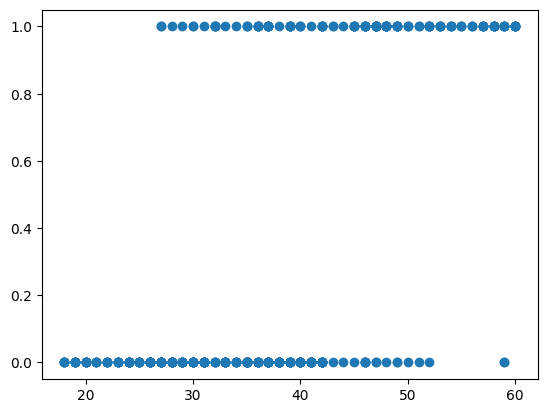

In [ ]:
plt.scatter(df.Age,df.Purchased)

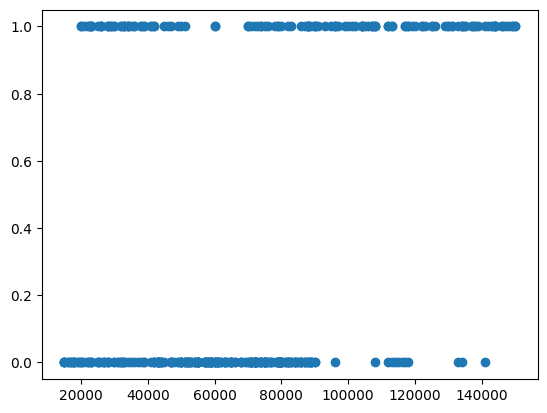

In [ ]:
plt.scatter(df.EstimatedSalary,df.Purchased)

In [ ]:
X = df[['Age']]
X[:3]

,Age
0,19.0
1,35.0
2,26.0


In [ ]:
y = df.Purchased
y[:3]

0    0
1    0
2    0
Name: Purchased, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR

LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
LR.predict([[30]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
LR.predict([[45]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
LR.predict_proba([[30],[45]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.90675612, 0.09324388],
       [0.39030723, 0.60969277]])

In [ ]:
y_pred = LR.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
y_test.values

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[52,  2],
       [ 7, 19]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

88.75

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
display(precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred))

0.9047619047619048

0.7307692307692307

0.8085106382978723